<a href="https://colab.research.google.com/github/Bogdan-Wiederspan/cnn_notebooks/blob/main/Tutorial_2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
import matplotlib.pyplot as plt


# Idea of this notebook
In this notebook you will learn a little bit about the workflow of working with convolutional networks. Therefore, you will learn how to split data and what to look for!
You will also learn how to fine-tune a model. Often, especially with convolutional networks, it is not feasible to start from scratch. We will go throught the process of fine-tune a pre-trained network. Since industrial-pre-trained notebooks are huge, we will discuss more of the general process. In the end you will learn a little bit about image data augmentation.

# The dataset
Lets first load the CIFAR dataset into our memory by utilising the ```tensorflow_datasets.load('cifar10')``` function. 

In [ ]:

# load the dataset from the tensorflow database 
(train_data,train_label), (test_data, test_label)  = tfds.load(name='cifar10' , 
                        split=['train', 'test'], 
                        shuffle_files=True, 
                        as_supervised=True, 
                        batch_size=-1)

# combine the dataset to one big dataset
# concat combines the data along an axis (=0 is the sample size)
all_data = tf.concat([train_data,test_data], axis=0)
all_label_numerical = tf.concat([train_label, test_label], axis=0)

# one-hot-encoding converts categories into vectors
# depth: number of categories (Cifar10 has 10 categories) 
all_label_one_hot = tf.one_hot(
            indices = all_label_numerical,
            depth = 10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteD6P5RK/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteD6P5RK/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.



The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. We combine them along the samplesize axis, because this time you should do the split yourself.

Since we wanna do supervised training ```as_supervised``` is set to true, returning always a tuple-pair of (image,label).
Again, batch_size controls the number of samples, with -1 returning all of the data. 

# Checkout the dataset
The first thing we want to do in the first place is to explore the data a little bit (honestly this is always the first thing to do). The exploration of this dataset can be quiet annoying by simply plotting the images with matplotlib. This time we use a service by the provider of the dataset:
https://knowyourdata-tfds.withgoogle.com/#dataset=cifar10&tab=STATS&group_by=default_segment.cifar10.label.value&select=default_segment.cifar10.label.value

What information can you extract about the dataset by using the website? What can you exctrat by using the Shape of the data tensor. Normally you will ask yourself things like:

- which labels are present in the dataset?
- how often are the categories presented (distribution of the data)?
- whats the dimension of the images
- whats the channel of the images
- often when ones download the data as numpy array the data is a 2D array. The second argument of this dataset would be the number 3072. Do you have any idea where this data is coming from?

Another thing one can ask himself is does the network learn more with HD-Images? What kind of problem will arise with HD images?

In [ ]:
print(f' traindata shape: {all_data.shape}')

 traindata shape: (60000, 32, 32, 3)


This time we have pictures of size 32x32 and the picture also got a color (last shape value is 3).
## Data distribution
Okay. This is all fine, but how do we get information about the distribution?
The **distribution desribes the number of unique events or categories**. 

The tensorflow function```tf.unique_with_counts(X)``` does excatly this. X needs to be an 1D tensor, a so called flat tensor. Flat tensors have the shape: 
```(num_all_elements,)```. Be careful with unique_with_counts, since the output tensors are not sorted! They are returned in the order how they are encountered in the dataset.

The return value of this function is a tuple containing: the unique values of the tensor, the index and the number of count of the class (in this order).

The questions we want you to answer is:
- how are the samples distributed?
- what is a good-to-learn-shape for a classifier network
- which plot form is a good choice to look at the distribution?


In [ ]:
# get unique counts with tf.unique_with_counts
unique_y, unique_id, unique_count = tf.unique_with_counts(all_label_numerical)

# mapping of label value to label
data_label = {
    '0':'airplane',
    '1':'automobile',
    '2':'bird',
    '3':'cat',
    '4':'deer',
    '5':'dog',
    '6':'frog',
    '7':'horse',
    '8':'ship',
    '9':'truck'
}

# get the labels in the correct order
unique_label = [data_label[str(num)] for num in unique_y.numpy()]

# convert the tensor into numpy arrays 
unique_y, unique_count = unique_y.numpy(), unique_count.numpy()

# print out in a table like fashion
# \t is a tab in python \n is a line break
print('Value,\t unique_y,\t\t unique_count')
for y, l, c in zip(unique_y, unique_label, unique_count):
  print(f'{y},\t {l} \t\t,{c}')



Value,	 unique_y,		 unique_count
7,	 horse 		,6000
8,	 ship 		,6000
4,	 deer 		,6000
6,	 frog 		,6000
5,	 dog 		,6000
2,	 bird 		,6000
9,	 truck 		,6000
3,	 cat 		,6000
0,	 airplane 		,6000
1,	 automobile 		,6000


# Plot the distribution:
The first approach could be to print out of the number of counts with the corresponding label. A better way is actually to use ```matplotlib.pyplot``` to plot the distribution. Which kind of plot is a good choice? Think about what you actually want; A plot to count samples in a specific category. The plot will be boring to look at, but this is just a warm up!

Hint about plotting tensors:
When you want to plot a tensor X. One needs to transfrom it back to an numpy array. This is done by using ```X.numpy()```. 
This is always possible! You can also always do the reverse thing by use the numpy arrays as input for ```tf.Tensor()```.  


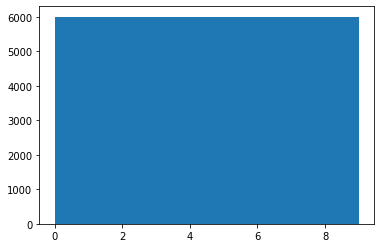

In [ ]:

#@title


# faster and better 
# to plot a histogram of all classes
# bins is the number of categories
plt.hist(all_label_numerical, bins=10, label=unique_label)
plt.show()

As i said this is boring to look at. Lets split the data and see how this affects the shape.

# How to split data:

In real-life you need to split your data by yourself. There are actually multiple ways to split the data. A great way to do this is the ```tf.data.Dataset``` class. 
We will use a more straightforward method: we will slice the ```all_data, all_label_numerical, all_label_one_hot``` to a specific index threshold. 

In real-life you would split the data into 3 parts: training, validation, and testing. We will just split the data into 2 parts. 

Hint about the calculation of the threshold:
The threshold is just a split-factor multiplitied with number of samples. Since indices are only ints we need to convert the threshold to an int. To round a tensor use```tf.math.round(x)```.

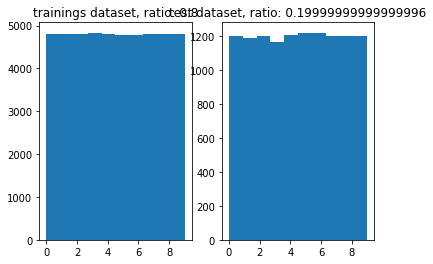

In [ ]:
# calculate the threshold
train_ratio = 0.8

number_of_sampels = all_data.shape[0]
split_threshold = tf.math.round(train_ratio * number_of_sampels).numpy()
split_threshold = int(split_threshold)

# split the data
train_hot_encode = all_label_one_hot[:split_threshold]
train_label = all_label_numerical[:split_threshold]
train_input = all_data[:split_threshold]

test_hot_encode = all_label_one_hot[split_threshold+1:]
test_label = all_label_numerical[split_threshold+1:]
test_input = all_data[split_threshold+1:]

# plot the data
fig, (ax_1,ax_2) = plt.subplots(1,2)
ax_1.hist(train_label, bins=10, label=unique_label)
ax_1.title.set_text(f'trainings dataset, ratio: {train_ratio}')
ax_2.hist(test_label, bins=10, label=unique_label)
ax_2.title.set_text(f'test dataset, ratio: {1 - train_ratio}')

plt.show()

Now we can split the data like we want, but what is a good choice for an ratio? Many people will say 80/10/10 is a nice ratio to start with. 

Actually there is not real rule to split the data. It actually depends on the amount of data you have.

Our goal is: 
We want to have a large trainings dataset to prevent overfitting. On the other hand we want our validation set to be still representative.

Representative means that the shape of our trainings and validation/test set are looking the same. In this case we know that all classes are uniform distributed (the boring plot from before). This is of course not always possible in real datasets (especially not in physics)
 test set.


### Your task: 
Play around with the split-ratios. Start with a very low split-ration (like 0.01) and increase it step-wise. 

Very low values would result, by chance, in an over or underrepresentation of a class. They are methods to counter this a little bit like weighting. How could you counter this?
How does the split ration ?/?/? converges, when the samplesize increases?

Always remember when splitting data: 
Your general goal is to have a big enough trainings dataset, but also a representative


# Use a pretrained network to predict Cifar10:
We want to classify the categories of the cifar10 dataset. Start a training from the scratch is most of the time a bad idea. There were some network architectures discussed in the presentation. Can you think which of them would be capable to predict the cifar10 dataset (judging from your experience so far)? 

Many industry giants and researcher made their model public (after a certain time has passed). 

# How to download, load pre-trained-networks
## Back:

You can download and load many pre-trained models by utilising the ```tensorflow.keras.applications``` class of keras. A list with all models can be found here: https://keras.io/api/applications/.

For example you could download the VGG16 network using:
```model = tensorflow.keras.applications.VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))```

```weights``` is the name of the weights ( in this case "imagenet"). this can also be a path or if None this will be random init values.

```include_top``` is a boolean to remove the fully connected classification network at the end (to replace it by one of your choice)

``` input_shape ``` this is the input shape of the Input Layer

## Today:
Tensorflow-hub is the new way to share trained models. Many tensorflow user upload their model and all of them can be used by using ```tensorflow_hub.load(url)``` 

## General workflow of pre-tuning:

Utilising a pre-trained network is called transfer learning (full guide can be found here: https://keras.io/guides/transfer_learning/). Normally when doing so we need to change the input shape as well as the classifcation network. 
 
Why might you want to utilize different image dimensions and not simply scale your input images, you may ask?

There are two common reasons:
- Your input image dimensions are smaller than what the convolutional network was trained on. Increasing their size introduces too many artifacts, which will again result in bad predictions.
- Your images are high resolution and contain small objects that are hard to detect.

Also can think about reasons why we need to switch-out the classifaction network too?

There is actually a limit in your choice for the input_shape: Since our convolutional network has layers that reduce the output size it your input shape needs to be big enough!



In [ ]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
	input_tensor=tf.keras.Input(shape=(32*4, 32*4, 3)))

base_model.summary()


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

As we saw before the image input is just too small for this network which is bad. So either we scale up our images (which could result in problems) or we use another network. This time we want to use a resize keras layer to scale the image up by a factor of 4.


In [ ]:
# preprocess input the same as the network was trained with
#tf.keras.applications.vgg16.preprocess_input()

# keras layer to resize our input on the fly
resize_layer = tf.keras.layers.Resizing(
    height=32*4,
    width=32*4,
    interpolation='bilinear',
    crop_to_aspect_ratio=False)

We also need to **freeze** our base_model.

Freezing is a fancy term to set the ```model.trainable``` parameter to false. This means, that the learnable parameter are NOT updated anymore! This is what we want. We want to freeze the convolutional network and train a classify on top!

In [ ]:

# first check the trainings status of the layers:
for l in base_model.layers:
    print(l.name, l.trainable)
    # set the trainings status to false
    l.trainable = False

    # you can also do this specificly to a certain layer:
    # but this time we wanted to freeze the entire base_model
    # model.layers[n].trainable = False

# lets check again
for l in base_model.layers:
    print(l.name, l.trainable)





input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


The first layer we need to implement into account is a pre-processing layer. The network was trained with a certain pre-processing. For example VGG16 used featurescaling with respect to the "imagenet" dataset. Without knowing these values the loaded network is useless.

The good thing keras always comes with a pre-process-input function: ```tf.keras.applications.vgg16.preprocess_input(
    x, data_format=None
)```

Sadly this is a function and not a layer. But we can convert this function into a layer by using a Lambda layer wrapper:


In [ ]:
preprocess_layer = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, input_shape=(128, 128, 3))

Lets assemble our network parts together and check if they are still partially frozen

In [ ]:
# assemble new network

frankenstein_model = tf.keras.models.Sequential()
frankenstein_model.add(resize_layer)
frankenstein_model.add(preprocess_layer)
frankenstein_model.add(base_model)
frankenstein_model.add(tf.keras.layers.Flatten())
frankenstein_model.add(tf.keras.layers.Dense(64, activation='relu'))
frankenstein_model.add(tf.keras.layers.Dense(64, activation='relu'))
frankenstein_model.add(tf.keras.layers.Dense(10, activation="softmax"))
frankenstein_model.build(input_shape=(None, 128,128,3))
frankenstein_model.summary()

# ooops? Why is the vgg net trainable?
# this is the problem with keras api it does "things" for you without asking
# when loading a frozen model into sequential it unfreezes the layers
print('\n Check of the network')
for l in frankenstein_model.layers:
    print(l.name, l.trainable)
    

# lets set them to freeze by hand
print('\n Freeze part of the network')
for l in frankenstein_model.layers[:3]:
    print(f'Before: {l.name, l.trainable}')
    l.trainable = False

    print(f'After: {l.trainable}')


print('\n Check again because of paranoia with keras')
for l in frankenstein_model.layers:
    print(l.name, l.trainable)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 128, 128, 3)       0         
                                                                 
 lambda_2 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                524352    
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 10)               

# Training:
Our little frankenstein-model is finished. Input data is automaticly sized by the Resize layer. The filters are already trained, so it is expected to be a simple trainings run. 

Now we need only to compile our new shiny(/ugly)-pre-tuned model and train the linear layers to classify our dataset. 

You will see that the results are great, since the most part of the network is already trained. (we will definitly overfit!, accuracy of 100%) 

```**WARNING** 
Please training this network will take some time! BE SURE TO USE A GPU! -> Runtime -> Change runtime type -> Hardware accelerator -> GPU!```

In [ ]:
frankenstein_model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

batch_size=128
epoch=3
shuffle=True

#print(train_input, train_label)
frankenstein_model.fit(train_input, train_hot_encode, batch_size=batch_size, epochs=epoch, verbose=True, shuffle=shuffle)



Epoch 1/20
375/375 [==============================] - 91s 207ms/step - loss: 0.7094 - acc: 0.7897
Epoch 2/20
375/375 [==============================] - 77s 206ms/step - loss: 0.3245 - acc: 0.8911
Epoch 3/20
375/375 [==============================] - 76s 204ms/step - loss: 0.2172 - acc: 0.9257
Epoch 4/20
375/375 [==============================] - 77s 205ms/step - loss: 0.1565 - acc: 0.9466
Epoch 5/20
375/375 [==============================] - 77s 206ms/step - loss: 0.1194 - acc: 0.9585
Epoch 6/20
375/375 [==============================] - 77s 205ms/step - loss: 0.1027 - acc: 0.9655
Epoch 7/20
375/375 [==============================] - 77s 204ms/step - loss: 0.0855 - acc: 0.9705
Epoch 8/20
 82/375 [=====>........................] - ETA: 1:00 - loss: 0.0681 - acc: 0.9781

KeyboardInterrupt: ignored

# Data augmentation
Sometimes our data capacity is quiet limited and getting more data is not always an option. Data augmentation is the poor-mans-solution to this problem.
We try to "modify" our inputs a little bit on-the-fly to put noise into our network, making it harder to overfit.

## Data augmentation with images
Now the neat part, data augmentation of images is quite simple with Keras.
We will use the ```tensorflow.keras.preprocessing.image.ImageDataGenerator```
(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to augment the data on the fly (within training). This reduces your memory usage but adds some additional time cost during model training. The big pro is the generator generates an infinite stream of input data!

The idea of this part is to show you how to augment a datastream and to show you how it will look like. 

The script below will plot 3 times the same image generated by the generator.
Each time the generator will apply the transformation on the same image.
Look into the api to check what the different setting do! And see the result by playing around.

Data augmentation is not always benefical. Can you think of why some transformations 
- would be less useful/effective then other in the context of convolutional networks?
- how they could even be harmful?

To answer the questions think always about whats your goal! You want to 
make the network learn about a rule, thus the transformation should not harm this rule.

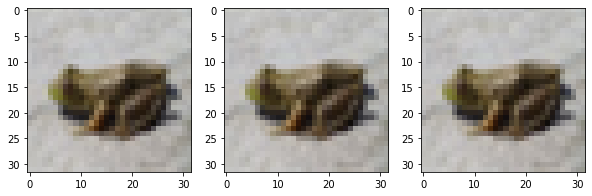

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)


# calculates any statistics required to for the transformation
# datagen is an generator
datagen.fit(train_input)

# create a python generator by using .flow
# when iterate through the generator a batch is sampelt
batch = datagen.flow(train_input, train_label, batch_size=1)

# fetch a sample of the generator 
sample_x, sample_y = batch.next()

fig, ax = plt.subplots(1, 3, figsize=(10,7))     
for i in range(3):
  # removes batch size 
  sample_x = tf.squeeze(sample_x)
  # removes negative values
  sample_x = sample_x.numpy().astype('uint8')
  ax.flatten()[i].imshow(sample_x)

plt.show()

When you want to train with a generator object you can use simple plain ```model.fit()```.
This command also accept generators. We just need to call the generator again with flow and redirect the batches into our fit! This would be a fit of a model with a augmented datastream!

You can try to make our little frankenstein_model better by using an augmented dataset. To restart the model you need to clear the output of all the networks before! 


In [ ]:
epochs = 3
batch_size = 128

# Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 
steps_per_epoch = None # None is equal to = len(train_input) // batch_size
frankenstein_model.fit(datagen.flow(train_input, train_hot_encode, batch_size=batch_size),
        steps_per_epoch=steps_per_epoch, epochs=epochs)

375/375 [==============================] - 79s 209ms/step - loss: 0.0846 - acc: 0.9724
